# Incidence du syndrome grippal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "inc-3-PAY-ds2.csv" # télécharger les données localement

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week geo_insee  indicator     inc  inc100  inc_up  inc_low  inc100_up  \
0    201601        FR          3   42263      65   48970    35556         75   
1    201602        FR          3   44617      68   51413    37821         79   
2    201603        FR          3   75277     116   83924    66630        129   
3    201604        FR          3  148473     228  160355   136591        246   
4    201605        FR          3  178963     275  191630   166296        294   
5    201606        FR          3  194921     299  200637   189205        308   
6    201607        FR          3  204604     314  210495   198713        323   
7    201608        FR          3  200681     308  206577   194785        317   
8    201609        FR          3  213380     328  219353   207407        337   
9    201610        FR          3  248576     382  254901   242251        391   
10   201611        FR          3  279636     429  286366   272906        440   
11   201612        FR          3  274533     421  281219   267847        432   
12   201613        FR          3  173684     267  179077   168291        275   
13   201614        FR          3  113384     174  117869   108899        181   
14   201615        FR          3   60388      93   63680    57096         98   
15   201616        FR          3   33397      51   35849    30945         55   
16   201617        FR          3   26981      41   29219    24743         45   
17   201618        FR          3   15274      23   16926    13622         26   
18   201619        FR          3   14358      22   15959    12757         24   
19   201620        FR          3    9853      15   11190     8516         17   
20   201621        FR          3    9944      15   11277     8611         17   
21   201622        FR          3    6648      10    7741     5555         12   
22   201623        FR          3    6151       9    7202     5100         11   
23   201624        FR          3    6264      10    7319     5209         11   
24   201625        FR          3    5345       8    6331     4359         10   
25   201626        FR          3    6027       9    7098     4956         11   
26   201627        FR          3    5202       8    6226     4178         10   
27   201628        FR          3    3320       5    4160     2480          6   
28   201629        FR          3    4056       6    5020     3092          8   
29   201630        FR          3    3540       5    4454     2626          7   
..      ...       ...        ...     ...     ...     ...      ...        ...   
484  202516        FR          3   26006      39   28568    23444         43   
485  202517        FR          3   20111      30   22320    17902         33   
486  202518        FR          3   16967      25   18996    14938         28   
487  202519        FR          3   17754      26   19794    15714         30   
488  202520        FR          3   23251      35   25546    20956         38   
489  202521        FR          3   22898      34   25167    20629         38   
490  202522        FR          3   17254      26   19251    15257         29   
491  202523        FR          3   19876      30   22004    17748         33   
492  202524        FR          3   19265      29   21368    17162         32   
493  202525        FR          3   19256      29   21342    17170         32   
494  202526        FR          3   18474      28   20532    16416         31   
495  202527        FR          3   17703      26   19725    15681         29   
496  202528        FR          3   18607      28   20753    16461         31   
497  202529        FR          3   15938      24   17990    13886         27   
498  202530        FR          3   18896      28   21165    16627         32   
499  202531        FR          3   20376      30   22799    17953         34   
500  202532        FR          3   19938      30   22479    17397         34   
501  202533        FR          3   13005      19   15114    10896         23   
502  20

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, geo_insee, indicator, inc, inc100, inc_up, inc_low, inc100_up, inc100_low]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [5]:
data = raw_data.dropna().copy()
data

week geo_insee  indicator     inc  inc100  inc_up  inc_low  inc100_up  \
0    201601        FR          3   42263      65   48970    35556         75   
1    201602        FR          3   44617      68   51413    37821         79   
2    201603        FR          3   75277     116   83924    66630        129   
3    201604        FR          3  148473     228  160355   136591        246   
4    201605        FR          3  178963     275  191630   166296        294   
5    201606        FR          3  194921     299  200637   189205        308   
6    201607        FR          3  204604     314  210495   198713        323   
7    201608        FR          3  200681     308  206577   194785        317   
8    201609        FR          3  213380     328  219353   207407        337   
9    201610        FR          3  248576     382  254901   242251        391   
10   201611        FR          3  279636     429  286366   272906        440   
11   201612        FR          3  274533     421  281219   267847        432   
12   201613        FR          3  173684     267  179077   168291        275   
13   201614        FR          3  113384     174  117869   108899        181   
14   201615        FR          3   60388      93   63680    57096         98   
15   201616        FR          3   33397      51   35849    30945         55   
16   201617        FR          3   26981      41   29219    24743         45   
17   201618        FR          3   15274      23   16926    13622         26   
18   201619        FR          3   14358      22   15959    12757         24   
19   201620        FR          3    9853      15   11190     8516         17   
20   201621        FR          3    9944      15   11277     8611         17   
21   201622        FR          3    6648      10    7741     5555         12   
22   201623        FR          3    6151       9    7202     5100         11   
23   201624        FR          3    6264      10    7319     5209         11   
24   201625        FR          3    5345       8    6331     4359         10   
25   201626        FR          3    6027       9    7098     4956         11   
26   201627        FR          3    5202       8    6226     4178         10   
27   201628        FR          3    3320       5    4160     2480          6   
28   201629        FR          3    4056       6    5020     3092          8   
29   201630        FR          3    3540       5    4454     2626          7   
..      ...       ...        ...     ...     ...     ...      ...        ...   
484  202516        FR          3   26006      39   28568    23444         43   
485  202517        FR          3   20111      30   22320    17902         33   
486  202518        FR          3   16967      25   18996    14938         28   
487  202519        FR          3   17754      26   19794    15714         30   
488  202520        FR          3   23251      35   25546    20956         38   
489  202521        FR          3   22898      34   25167    20629         38   
490  202522        FR          3   17254      26   19251    15257         29   
491  202523        FR          3   19876      30   22004    17748         33   
492  202524        FR          3   19265      29   21368    17162         32   
493  202525        FR          3   19256      29   21342    17170         32   
494  202526        FR          3   18474      28   20532    16416         31   
495  202527        FR          3   17703      26   19725    15681         29   
496  202528        FR          3   18607      28   20753    16461         31   
497  202529        FR          3   15938      24   17990    13886         27   
498  202530        FR          3   18896      28   21165    16627         32   
499  202531        FR          3   20376      30   22799    17953         34   
500  202532        FR          3   19938      30   22479    17397         34   
501  202533        FR          3   13005      19   15114    10896         23   
502  20

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

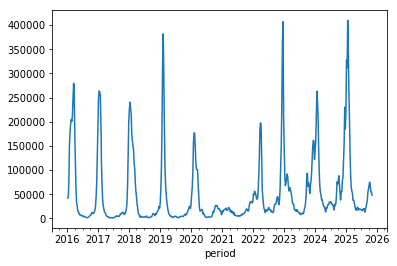

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

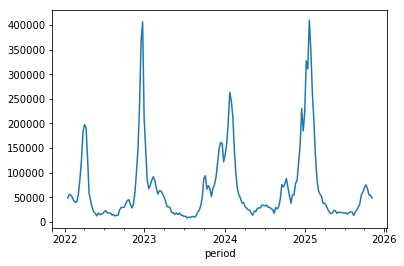

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [11]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

AssertionError: 

Voici les incidences annuelles.

In [ ]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [ ]:
yearly_incidence.sort_values()

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

In [ ]:
yearly_incidence.hist(xrot=20)